# Lab 1 - Statistical Distributions

This lab will focus on statistical distributions including both continuous and non-continuous distributions. We will also cover the use and conversion of probabilities to 'sigma'.

In [118]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## A Little Statistics

## 1.

**Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.**

## A)

**Look up the Normal distribution and read about it. A few potential starting points: Math is fun, Wolfram, and a useful z table**

We have read about the normal distribution about a point and corresponding z table values.

## B)

**As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to specific statistical cumulative probability distributions such as stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values that match the z-table.**

We now move on to checking that we can easily calculate the integral under the distribution by using the error function, which in this case is called by using stats.norm.cdf(x) where x is the value of sigma (standard deviations) away from the center of the distribution.

In [2]:
stats.norm.cdf(0)

0.5

We check the values with the z scores in the Standard Normal table (https://en.wikipedia.org/wiki/Standard_normal_table):

	0.50000

In [3]:
stats.norm.cdf(0.1)

0.539827837277029

	0.53983

In [4]:
stats.norm.cdf(-0.1)

0.460172162722971

	0.46017

In [5]:
stats.norm.cdf(0.5)

0.6914624612740131

	0.69146

In [6]:
stats.norm.cdf(-0.5)

0.3085375387259869

	0.30854

In [28]:
stats.norm.cdf(2)

0.9772498680518208

	0.97725

In [29]:
stats.norm.cdf(-2)

0.022750131948179195

	0.02275

These values all seem to match the z scores from the Standard Normal table.

## C)

**Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: stats.norm.ppf() in python. Try several probability values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.**

Here, we check that the inverse of the integral of the normal distribution.
Keep in mind the symmetric sigma along both wings of the distribution.

From the Lecture #1 notes
5 sigma = 2.87e-7 (for e.g. probability of signal being produced from background noise) - otherwise 5 sigma = 1-(2.87e-7)

In [9]:
stats.norm.ppf(2.87e-7)

-4.999765776842555

In [32]:
stats.norm.ppf(1-2.87e-7)

4.9997657768508095

1 sigma = .84 (which we have found out by using stats.norm.cdf below)

In [31]:
stats.norm.cdf(1)

0.8413447460685429

In [33]:
stats.norm.ppf(0.84)

0.994457883209753

2 sigma = 0.954

In [12]:
stats.norm.ppf(.977)

1.9953933101678245

In [11]:
stats.norm.ppf(0.023)

-1.9953933101678247

## D)

**If a minus sign appears, think about it and explain the meaning.**

When integrating over a standard normal distribution (standard Gaussian), we integrate from negative infinity up to the value x in stats.norm.cdf(x). Thus, we integrate from left up to the value, and this yields the probability that is under the probability density curve (our distribution) up to that value - remembering that since this is a standard normal distribution, this value is in terms of 'sigma'. Since the mean of the standard distribution is at 0 sigma, a positive sigma indicates the probability we have found through the integration is left of the value and will be larger than 0.5. If the sigma-value is negative, we have also integrated left of the sigma-value, but now **the probability is less than 0.5**. If we want to find the positive sigma-value, we can simply do stats.norm.ppf of one minus that same probability-value since the standard distribution is symmetric.

## 2.

**Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.**

## A)

**Read up on your distribution**

I have read about the **Lognormal** distribution and will focus on this specific distribution for the following task.

## B)

**Make plots (tweaking distribution and plot parameters as needed)**

Producing a Lognormal distribution using scipy. We make sure to use size = 100k.

In [13]:
s = 1
d = stats.lognorm.rvs(s, size = 100000)

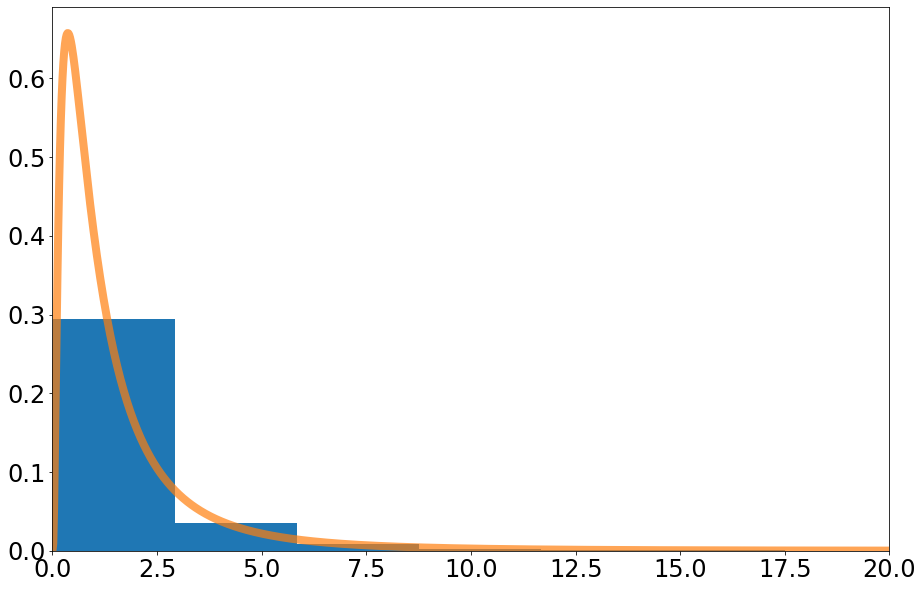

In [14]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(0,20,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

As we can see by comparing the plots above and below, changing the s parameter in the LogNormal distribution. This changes the shape of the distribution. A smaller s ("shape parameter") makes for a more densely packed distribution with little deviation, while a higher s yields a distribution that is flatter with more deviation.

In [38]:
s = .7
d = stats.lognorm.rvs(s, size = 100000)

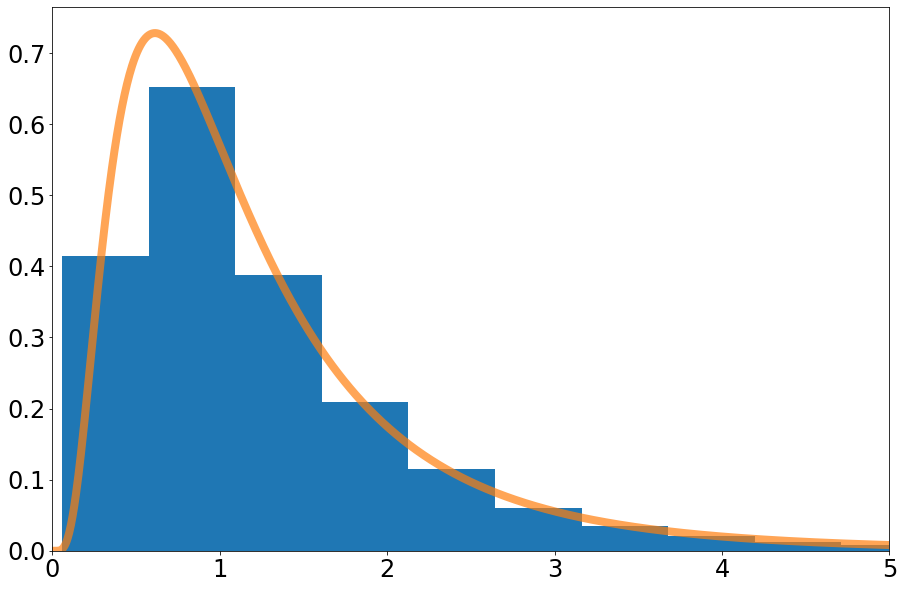

In [39]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

In [15]:
s = .5
d = stats.lognorm.rvs(s, size = 100000)

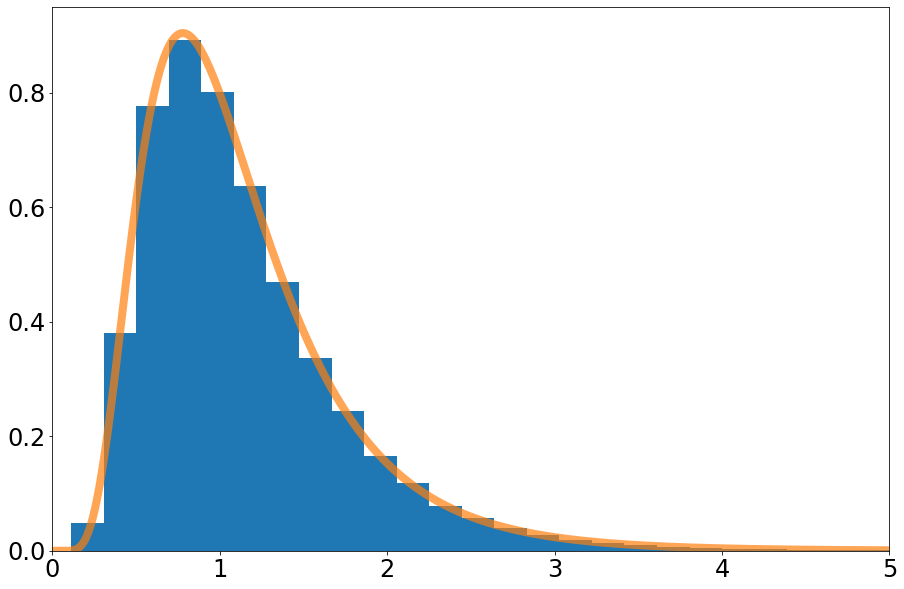

In [17]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

In [34]:
s = .1
d = stats.lognorm.rvs(s, size = 100000)

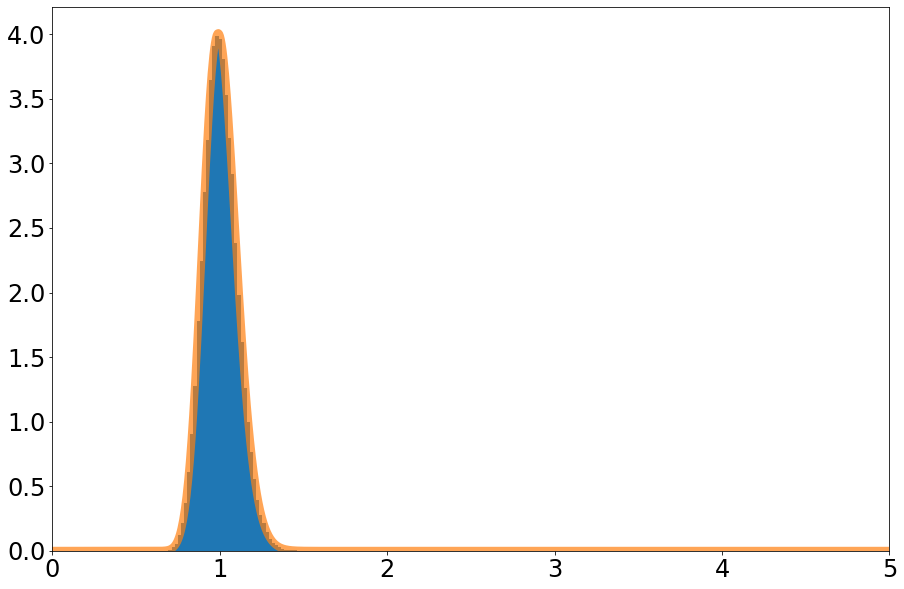

In [35]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

In [44]:
s = 1.1
d = stats.lognorm.rvs(s, size = 100000)

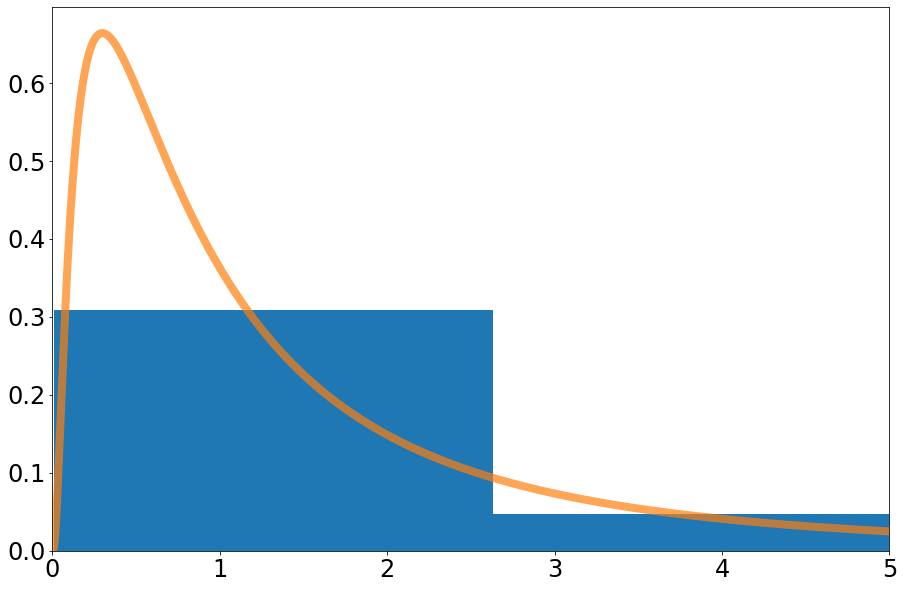

In [45]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

Out of curiosity, I tested to see what a **chi-squared** distribution looks like.

In [18]:
d = stats.chi2.rvs(df=50, size=100000)

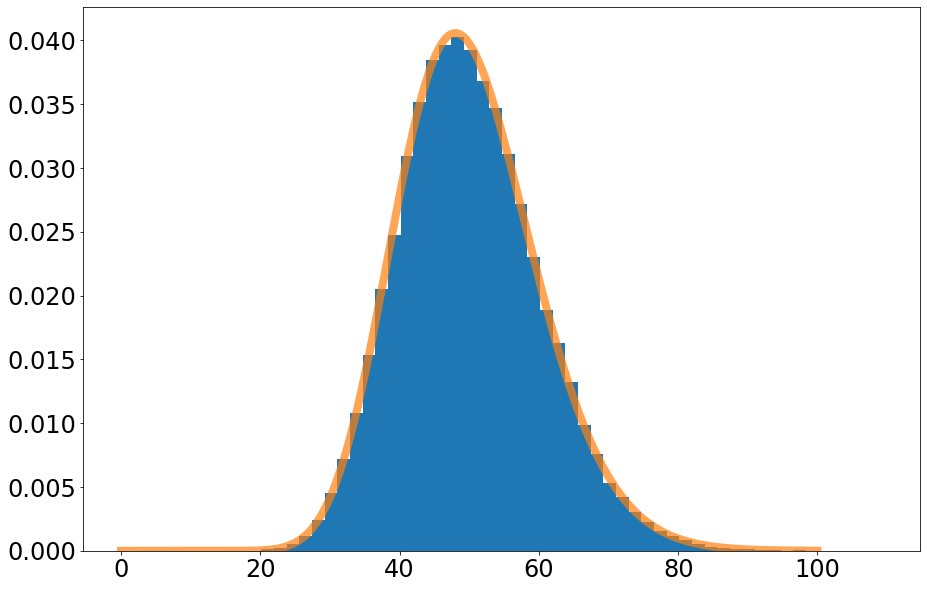

In [20]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
#plt.xlim([0,20])
x = np.linspace(0,100,1000)
ax.plot(x, stats.chi2.pdf(x, df=50),linewidth = 8,alpha = 0.7)
plt.show()

## 3.

**Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'**

## A)

**Select a value for your hypothetical measurement**

I will be using the lognormal distribution with the parameters defined below (s=0.7) since this visibly looked best.
I select the value 2.5 for my hypothetical measurement.

In [38]:
s = .7
d = stats.lognorm.rvs(s, size = 100000)

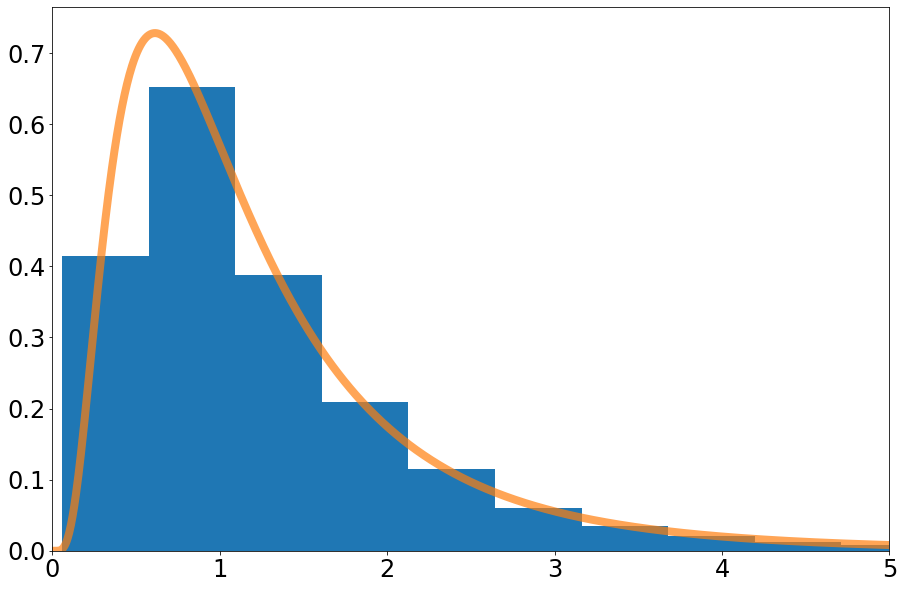

In [39]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

## B)

**Clearly state the statistical question you want to ask in words**

Now that I have picked the value 2.5 for my hypothetical measurement, we can say that some measurement at the value 2.5 can have been caused by the "background noise" and not by an actual signal. We then want to know how large the probability is that the measurement was just caused by fluctuations coming from the background. Then, our statistical question becomes:

For our measurement at the value 2.5 there is some integrated probability right of this value that corresponds to the a sigma in a standard normal distribution. What is the sigma for which the integrated probability under a standard normal distribution right of this sigma is equal to the probability one gets by integrating right of the value 2.5 in our data-distribution?

## C)

**Convert your word question into a mathematical integral**

Our data distribution is referred to as f(x) while the standard normal distribution is s(x). Then, we refer to the x-axis in both cases as x.

The probability of the measurement being caused by the background is:

$$\mathcal{P(2.5)} = \int_{2.5}^{\infty} \! f(x) \, \mathrm{d}x$$

And if you want to find sigma:

$$\int_{\sigma}^{\infty} \! s(x) \, \mathrm{d}x = \int_{2.5}^{\infty} \! f(x) \, \mathrm{d}x$$

Or alternatively,

$$1 - \int_{-\infty}^{-\sigma} \! s(x) \, \mathrm{d}x = \int_{2.5}^{\infty} \! f(x) \, \mathrm{d}x$$

## D)

**Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. .cdf() and .ppf() in scipy).**

In [53]:
s = 0.7
prob_datadistribution = 1 - stats.lognorm.cdf(2.5, s)
prob_datadistribution

0.09526941785499088

In [59]:
print(f'The probability of the background producing this signal is {prob_datadistribution:.3f}.')

The probability of the background producing this signal is 0.095.


## E)

**Convert your probability into an equivalent 'sigma'**

In [56]:
sigma = stats.norm.ppf(1-prob_datadistribution)
sigma

1.3089867598202218

In [62]:
print(f'The sigma corresponding to this probability is {sigma:.1f}.')

The sigma corresponding to this probability is 1.3.


## 4.

**Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.**

Below, we can see that as we choose a higher value where the probability density becomes lower, the value of sigma becomes higher as the probability of that measurement being caused by the background decreases. We try to make it clear what our changing measurement value is by assigning it the variable name 'x'.

In [74]:
x = 3
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

1.5694461266687276

In [75]:
x = 5
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

2.2991970177629995

In [76]:
x = 10
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

3.289407275705788

We can tell that when the measurement value is 1, sigma is 0. Thus, 1 is our mean value (which happens to be the default mean of the distribution according to scipy's documentation).

In [77]:
x = 1
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

0.0

And, as expected, when we have a measurement value lower than (or left of) the mean, we get a sigma that is negative (and left of 0).

In [78]:
x = 0.5
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

-0.9902102579427795

## Non-Continuous Distributions

## 1.

**One of you will study the Binomial, and the other the Poisson. Flip a coin to figure out who does which.**

## A)

**Read up on the distributions**

I chose the Poisson distribution.

## B)

**Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).**

In the plots below, I focus on varying 'mu' which is the expected outcome of occurrences for the Poisson distribution - in most cases, the distribution will be centered around this value, except for example when mu=0.9.

In [169]:
mu = 5

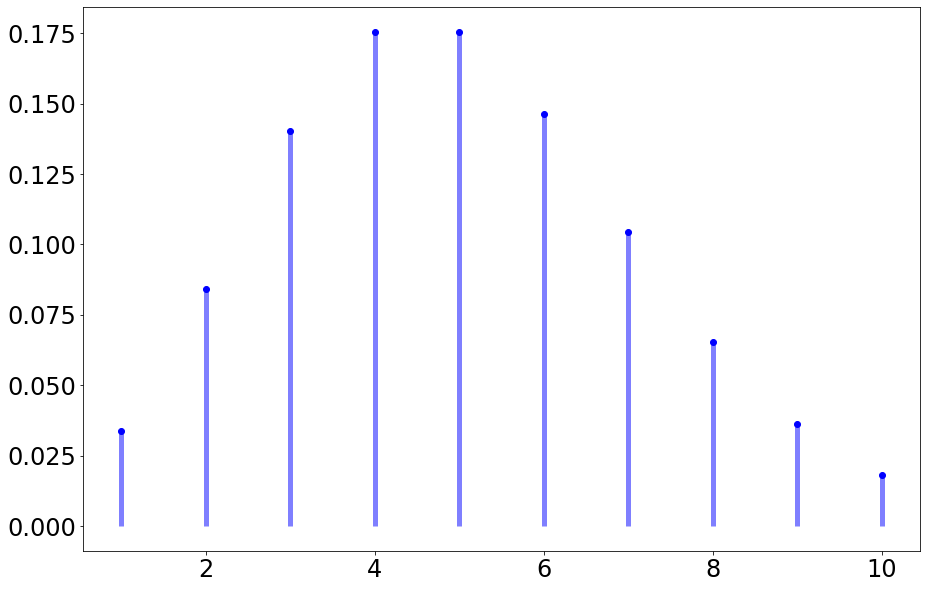

In [170]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [171]:
mu = 1

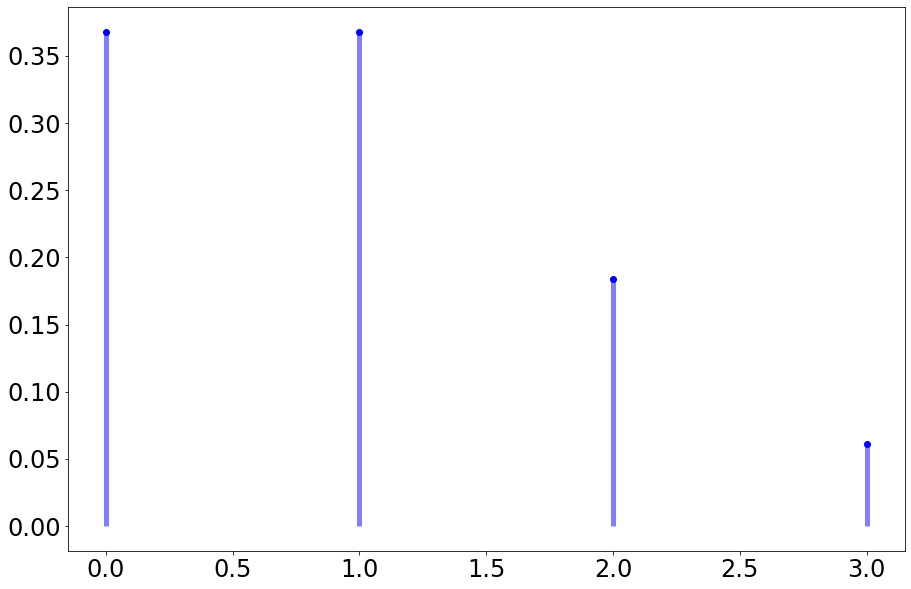

In [172]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [173]:
mu = 0.9

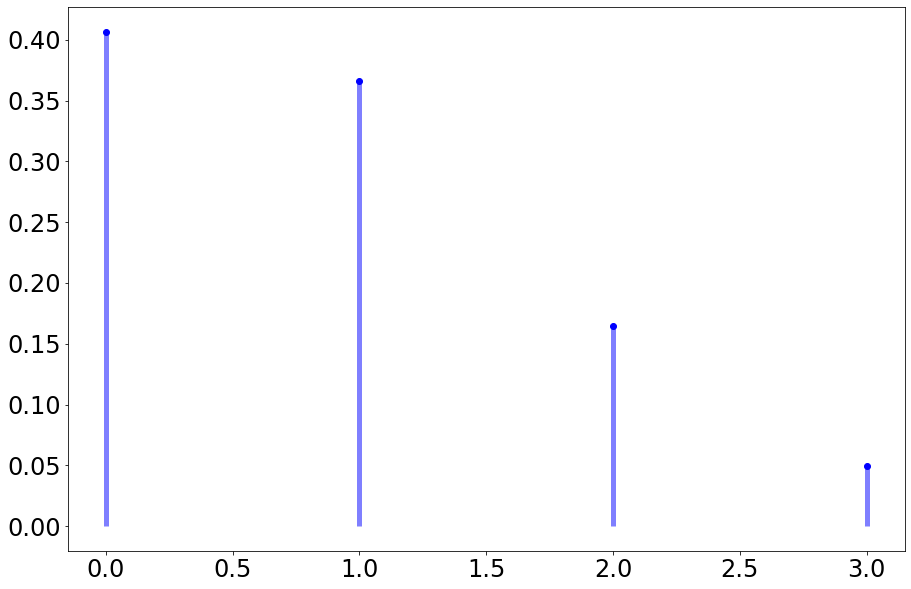

In [174]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [175]:
mu = 10

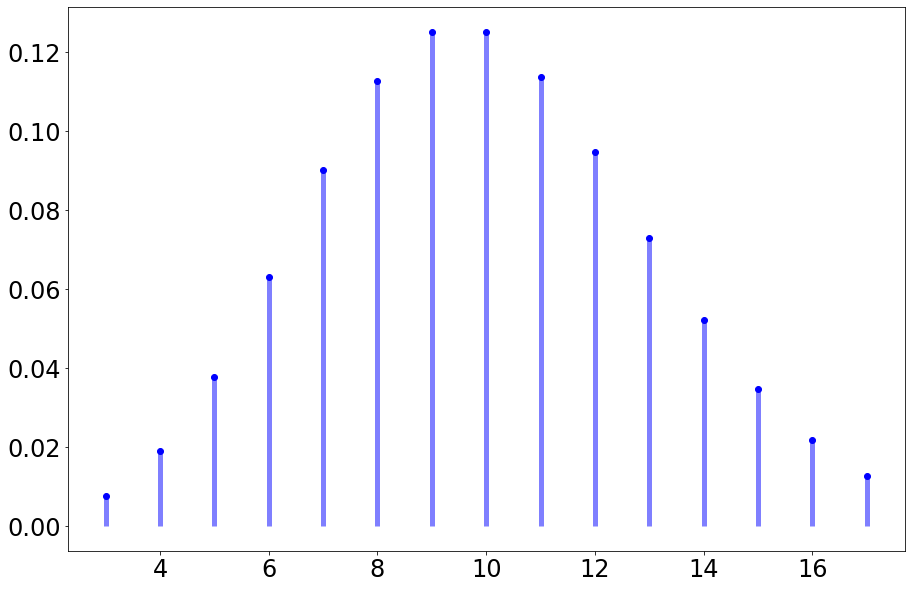

In [176]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

When you increase mu (the expected rate of occurrences), the distribution seems to become Gaussian-like.

In [177]:
mu = 100

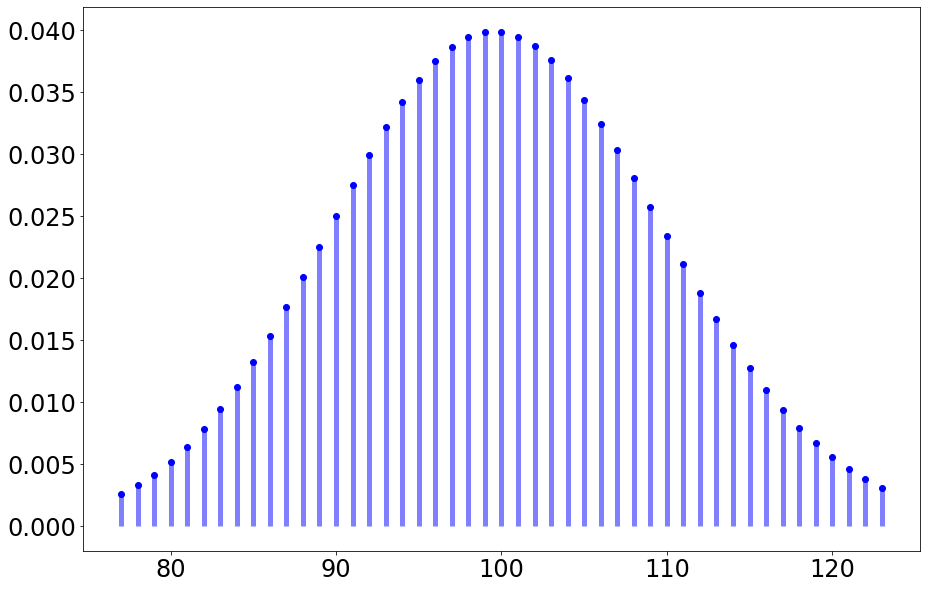

In [178]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

And we can in fact look closer at this by plotting the distribution on a semilog plot.

If in fact, the distribution approaches a sort of Gaussian shape then when plotting the y-axis in log one would expect to see a second-degree polynomial.

In [179]:
mu = 100

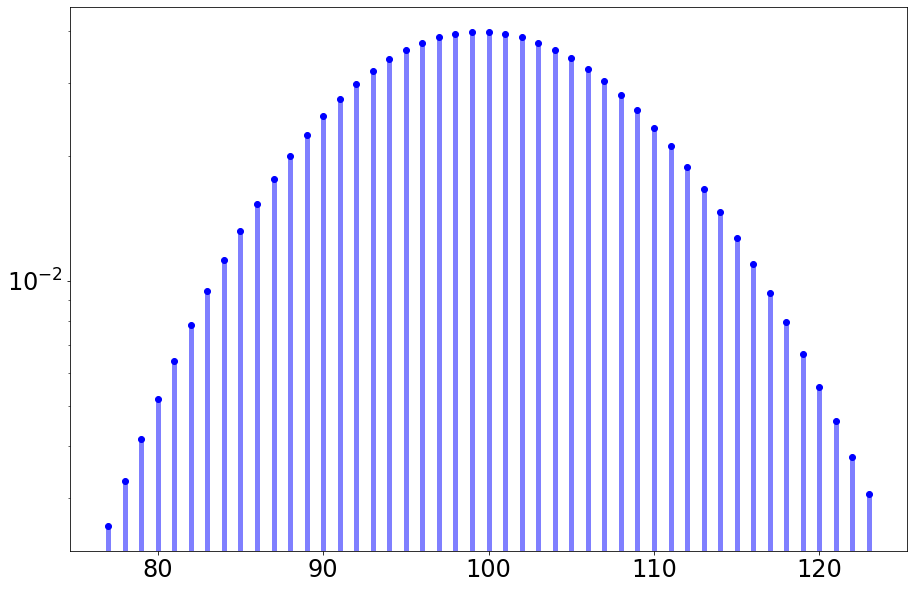

In [180]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_yscale('log')
plt.show()

...which is what we appear to see here. Thus, as mu becomes very large, the distribution appears Gaussian (although it is discrete in nature).

## C)

**Again define a hypothetical question (clearly stated), and calculate the corresponding probability**

I will be using the plot below in my calculations, and I choose to evaluate the probability at the measurement value 8.

In [185]:
mu = 5

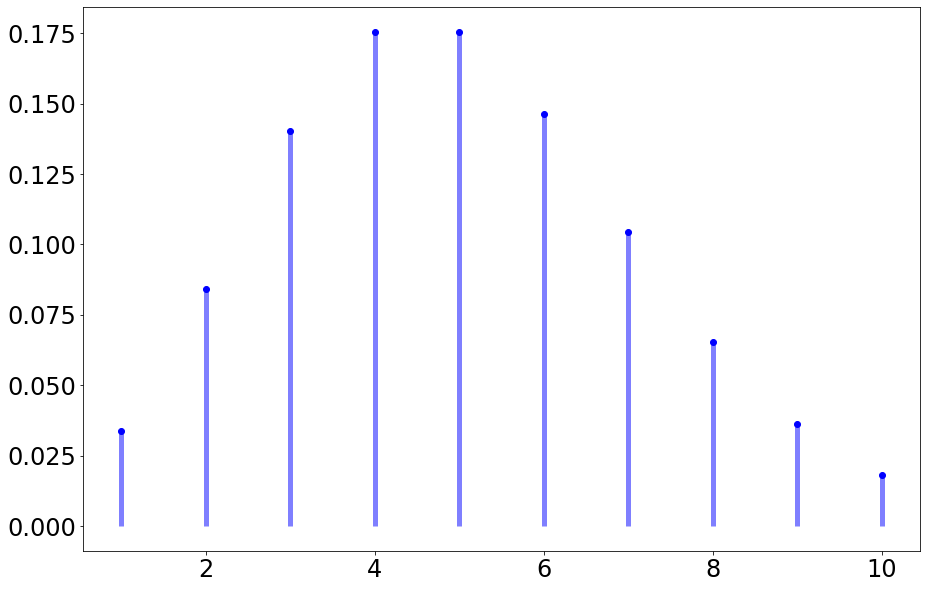

In [186]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

Our distribution will show the rate of occurrences during a certain time interval (could be for example the expected number of incoming calls to a call center per hour).

Thus, our question becomes:
What is the probability that we measure some event happen at least 8 times during this time interval?

Remember, since we are integrating - or in this discrete case summing - over the values left of the requested value (8) we need to subtract the probability we get from 1.

In [197]:
x = 8
prob_poisson = 1 - stats.poisson.cdf(x, mu)
prob_poisson

0.06809363472184837

In [198]:
print(f'The probability that the event happens at least 8 times is {prob_poisson:.3f}')

The probability that the event happens at least 8 times is 0.068


We find the sigma the same way as previously:

In [199]:
sigma_poisson = stats.norm.ppf(1-prob_poisson)
sigma_poisson

1.4901406054758806

In [201]:
print(f'The sigma corresponding to this probability is {sigma_poisson:.1f}')

The sigma corresponding to this probability is 1.5


## D)

**Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.**

Now that our distribution is discrete, we essentially end up summing over each discrete value on the x-axis of our distribution (1, 2, 3,...). This is different from previously when we integrated over a continuous distribution. Thus, the physically measurements one can make are limited to only discrete values and the 'array' of probabilities corresponding to these measureable values are on discrete intervals.

## E)

**While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.**

Although the distribution and the probabilities are discrete, it still makes sense that the sigmas can be some non-integer number. This is because even though our data distribution is discrete in nature, we still report our value in sigmas by integrating under a **continuous** distribution, namely the standard normal distribution. This will give us any sigma that corresponds to the probability we got from summing over the discrete distribution. The values for measurements of f.ex. 6, 7 or 8 in our distribution will have discrete intervals between their corresponding probabilities, simply because they correspond to discrete physical parameters - however, there is nothing standing in our way of getting a probability (a 'sigma') that has some decimal value. For example, given our probability above of 0.068, we "inverse-integrate" over the standard distribution and get a sigma of about 1.5.

Hence, the possible measureable values in the discrete distribution do not change - they stay discontinuous - but we end up integrating over the continuous standard normal distribution.